# Chapter 3

In [2]:
%matplotlib inline

In [4]:
def f(a, b):
    return b

In [6]:
from time import time
from functools import partial

import numpy as np
import pandas as pd
import tensorflow as tf

from IPython.display import SVG
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.wrappers.scikit_learn import KerasRegressor

seed = 0
np.random.seed(seed)

In [7]:
x = np.array([
    [2, 5, 7, 9, 1, 4, 6, 8],
    [4, 3.8, 3.5, 3] * 2,
]).T
y = np.array([1] * 4 + [0] * 4)[:, None]
y_ohe = np.eye(2)[y.ravel()]

In [15]:
y_ohe

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [8]:
x.shape

(8, 2)

In [9]:
y.shape

(8, 1)

In [10]:
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

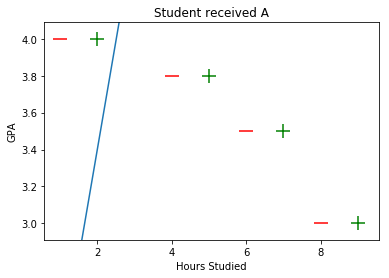

In [8]:
cols = ['GPA', 'HoursStudied', 'GotA']
df = pd.DataFrame(
    {
        cols[0]: [4, 3.8, 3.5, 3] * 2,
        cols[1]: [2, 5, 7, 9, 1, 4, 6, 8],
        cols[2]: [True] * 4 + [False] * 4
    })
df = df.sample(n=len(df), random_state=0)[cols]
colors = {True: 'green', False: 'red'}
markers = {True: '+', False: '_'}

for class_ in colors:
    df_ = df[df[cols[2]] == class_]
    _ = plt.scatter(df_[cols[1]], df_[cols[0]],
                    s=200,
                c=colors[class_],
                marker=markers[class_]
               )
plt.title('Student received A')
plt.xlabel('Hours Studied')
plt.ylabel(cols[0])
# plt.xlim([-5, 10])
# plt.ylim([-5, 5])


w1=-0.375; w2 = 0.441; b = 0.394

newline([0, -b / w1], [-b / w2, 0])
# newline([8.7, 3], [4.7, 3.8])
plt.show()

### Multi Layer Perceptron

In [11]:
class SingleLayerPerceptron:
    def __init__(self,
                 learning_rate,
                 hidden_units,
                 n_features):
        n_classes = 2
        self.features = tf.placeholder("float",
                                       [None, n_features])
        self.targets = tf.placeholder("float",
                                      [None, n_classes])
        w_hidden = tf.Variable(tf.random_normal([n_features,
                                                 hidden_units]))
        w_out = tf.Variable(tf.random_normal([hidden_units,
                                              n_classes]))
        b_hidden = tf.Variable(tf.random_normal([hidden_units]))
        b_out = tf.Variable(tf.random_normal([n_classes]))
        
        layer_hidden = tf.add(tf.matmul(self.features,
                                        w_hidden), b_hidden)
        layer_hidden = tf.nn.relu(layer_hidden)
        self.logits = tf.matmul(layer_hidden, w_out) + b_out
        self.loss_op = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=self.logits, labels=self.targets))
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        self.train_op = optimizer.minimize(self.loss_op)
        
    def fit(self, x, y, epochs=100, verbose=True, print_every=1):
        y = np.eye(2)[y.ravel()]
        
        accuracies = []
        losses = []
        output_string = 'Epoch: {:4d}, accuracy: {:6.3f}, cost: {:.2f}'

        with tf.Session() as sess:
            init = tf.global_variables_initializer()
            sess.run(init)

            for epoch in range(epochs):
                _, loss = sess.run([self.train_op, self.loss_op],
                                   feed_dict={self.features: x,
                                              self.targets: y})
                

                pred = tf.nn.sigmoid(self.logits)
                is_correct = tf.equal(tf.argmax(pred, 1),
                                      tf.argmax(self.targets, 1))
                accuracy_op = tf.reduce_mean(
                    tf.cast(is_correct, "float"))
                accuracy = accuracy_op.eval({self.features: x,
                                        self.targets: y})

                if verbose and (epoch + 1) % print_every == 0:
                    print(output_string.format(epoch + 1,
                                               accuracy,
                                               loss))
                losses.append(loss)
                accuracies.append(accuracy)
                
        return accuracies, losses

In [14]:
learning_rate = 0.1
epochs = 250
hidden_units = 256
n_features = 2

slp = SingleLayerPerceptron(learning_rate,
                            hidden_units,
                            n_features)
accuracies, costs = slp.fit(x, y, epochs=epochs)

Epoch:    1, accuracy:  0.500, cost: 20.33
Epoch:    2, accuracy:  0.500, cost: 53.60
Epoch:    3, accuracy:  0.625, cost: 46.84
Epoch:    4, accuracy:  0.500, cost: 22.50
Epoch:    5, accuracy:  0.625, cost: 14.83
Epoch:    6, accuracy:  0.500, cost: 21.62
Epoch:    7, accuracy:  0.500, cost: 23.32
Epoch:    8, accuracy:  0.500, cost: 22.85
Epoch:    9, accuracy:  0.625, cost: 10.04
Epoch:   10, accuracy:  0.625, cost: 11.35
Epoch:   11, accuracy:  0.625, cost: 15.42
Epoch:   12, accuracy:  0.625, cost: 12.84
Epoch:   13, accuracy:  0.500, cost: 17.91
Epoch:   14, accuracy:  0.625, cost: 14.64
Epoch:   15, accuracy:  0.500, cost: 4.01
Epoch:   16, accuracy:  0.500, cost: 12.84
Epoch:   17, accuracy:  0.375, cost: 20.10
Epoch:   18, accuracy:  0.500, cost: 18.39
Epoch:   19, accuracy:  0.750, cost: 10.14
Epoch:   20, accuracy:  0.500, cost: 3.38
Epoch:   21, accuracy:  0.500, cost: 10.80
Epoch:   22, accuracy:  0.750, cost: 10.41
Epoch:   23, accuracy:  0.750, cost: 3.37
Epoch:   24, a

Epoch:  197, accuracy:  1.000, cost: 0.10
Epoch:  198, accuracy:  1.000, cost: 0.10
Epoch:  199, accuracy:  1.000, cost: 0.10
Epoch:  200, accuracy:  1.000, cost: 0.10
Epoch:  201, accuracy:  1.000, cost: 0.10
Epoch:  202, accuracy:  1.000, cost: 0.10
Epoch:  203, accuracy:  1.000, cost: 0.10
Epoch:  204, accuracy:  1.000, cost: 0.10
Epoch:  205, accuracy:  1.000, cost: 0.10
Epoch:  206, accuracy:  1.000, cost: 0.09
Epoch:  207, accuracy:  1.000, cost: 0.09
Epoch:  208, accuracy:  1.000, cost: 0.09
Epoch:  209, accuracy:  1.000, cost: 0.09
Epoch:  210, accuracy:  1.000, cost: 0.09
Epoch:  211, accuracy:  1.000, cost: 0.09
Epoch:  212, accuracy:  1.000, cost: 0.09
Epoch:  213, accuracy:  1.000, cost: 0.09
Epoch:  214, accuracy:  1.000, cost: 0.09
Epoch:  215, accuracy:  1.000, cost: 0.09
Epoch:  216, accuracy:  1.000, cost: 0.09
Epoch:  217, accuracy:  1.000, cost: 0.09
Epoch:  218, accuracy:  1.000, cost: 0.09
Epoch:  219, accuracy:  1.000, cost: 0.09
Epoch:  220, accuracy:  1.000, cos

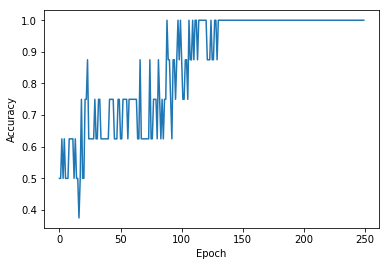

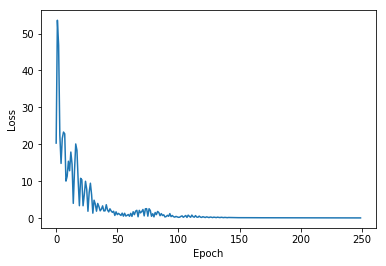

In [15]:
plt.plot(range(epochs), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
_ = plt.plot(range(epochs), costs)
plt.xlabel('Epoch')
_ = plt.ylabel('Loss')

### MLP
http://deeplearning.net/tutorial/mlp.html

Keras

In [12]:
class MultiLayerPerceptronKeras:
    def __init__(self,
                 hidden_units,
                 activation='relu'
                ):
        self.history = None
        self.model = Sequential()
        for index, units in enumerate(hidden_units):
            if index == 0:
                self.model.add(Dense(units,
                                     input_dim=2,
                                     activation=activation))
            else:
                self.model.add(Dense(units, activation=activation))
            
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
        print(self.model.summary())
        
    def plot_history(self):
        if self.history:
            epochs = len(self.history.history['loss'])
            plt.plot(range(1, epochs + 1), self.history.history['loss'])
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()
            plt.plot(range(1, epochs + 1), self.history.history['acc']);
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy');
        
    def fit(self, x, y, epochs=100):
        tensorboard = TensorBoard(log_dir="logs/{}".format(time()),
                                  histogram_freq=10)
        saver = tf.train.Saver()
        history = self.model.fit(x, y,
                                 epochs=epochs,
                                 validation_data=(x, y),
                                 callbacks=[tensorboard]
                                )
        self.history = history
        return history
    
    def plot_model(self):
        return SVG(model_to_dot(self.model).create(prog='dot',
                                                   format='svg'))

In [13]:
mlp = MultiLayerPerceptronKeras(hidden_units=(256, ),
                                activation='relu')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               768       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
plot_model(mlp.model, 'model.png')

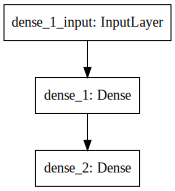

In [11]:
mlp.plot_model()

Train on 8 samples, validate on 8 samples
Epoch 1/250
8/8 [==============================] - 0s 419us/step - loss: 0.5647 - acc: 0.7500 - val_loss: 0.5641 - val_acc: 0.7500
Epoch 2/250
8/8 [==============================] - 0s 250us/step - loss: 0.5641 - acc: 0.7500 - val_loss: 0.5633 - val_acc: 0.7500
Epoch 3/250
8/8 [==============================] - 0s 223us/step - loss: 0.5633 - acc: 0.7500 - val_loss: 0.5626 - val_acc: 0.7500
Epoch 4/250
8/8 [==============================] - 0s 302us/step - loss: 0.5626 - acc: 0.7500 - val_loss: 0.5620 - val_acc: 0.7500
Epoch 5/250
8/8 [==============================] - 0s 202us/step - loss: 0.5620 - acc: 0.7500 - val_loss: 0.5614 - val_acc: 0.7500
Epoch 6/250
8/8 [==============================] - 0s 199us/step - loss: 0.5614 - acc: 0.7500 - val_loss: 0.5607 - val_acc: 0.7500
Epoch 7/250
8/8 [==============================] - 0s 214us/step - loss: 0.5607 - acc: 0.7500 - val_loss: 0.5601 - val_acc: 0.7500
Epoch 8/250
8/8 [========================

Epoch 63/250
8/8 [==============================] - 0s 281us/step - loss: 0.5227 - acc: 0.8750 - val_loss: 0.5219 - val_acc: 0.8750
Epoch 64/250
8/8 [==============================] - 0s 347us/step - loss: 0.5219 - acc: 0.8750 - val_loss: 0.5211 - val_acc: 0.8750
Epoch 65/250
8/8 [==============================] - 0s 383us/step - loss: 0.5211 - acc: 0.8750 - val_loss: 0.5204 - val_acc: 0.8750
Epoch 66/250
8/8 [==============================] - 0s 304us/step - loss: 0.5204 - acc: 0.8750 - val_loss: 0.5196 - val_acc: 0.8750
Epoch 67/250
8/8 [==============================] - 0s 385us/step - loss: 0.5196 - acc: 0.8750 - val_loss: 0.5188 - val_acc: 0.8750
Epoch 68/250
8/8 [==============================] - 0s 392us/step - loss: 0.5188 - acc: 0.8750 - val_loss: 0.5181 - val_acc: 0.8750
Epoch 69/250
8/8 [==============================] - 0s 501us/step - loss: 0.5181 - acc: 0.8750 - val_loss: 0.5174 - val_acc: 0.8750
Epoch 70/250
8/8 [==============================] - 0s 555us/step - loss: 0.

Epoch 125/250
8/8 [==============================] - 0s 575us/step - loss: 0.4761 - acc: 0.8750 - val_loss: 0.4752 - val_acc: 0.8750
Epoch 126/250
8/8 [==============================] - 0s 301us/step - loss: 0.4752 - acc: 0.8750 - val_loss: 0.4746 - val_acc: 0.8750
Epoch 127/250
8/8 [==============================] - 0s 281us/step - loss: 0.4746 - acc: 0.8750 - val_loss: 0.4740 - val_acc: 0.8750
Epoch 128/250
8/8 [==============================] - 0s 268us/step - loss: 0.4740 - acc: 0.8750 - val_loss: 0.4732 - val_acc: 0.8750
Epoch 129/250
8/8 [==============================] - 0s 243us/step - loss: 0.4732 - acc: 0.8750 - val_loss: 0.4722 - val_acc: 0.8750
Epoch 130/250
8/8 [==============================] - 0s 313us/step - loss: 0.4722 - acc: 0.8750 - val_loss: 0.4714 - val_acc: 0.8750
Epoch 131/250
8/8 [==============================] - 0s 758us/step - loss: 0.4714 - acc: 0.8750 - val_loss: 0.4707 - val_acc: 0.8750
Epoch 132/250
8/8 [==============================] - 0s 551us/step - 

Epoch 187/250
8/8 [==============================] - 0s 638us/step - loss: 0.4279 - acc: 1.0000 - val_loss: 0.4271 - val_acc: 1.0000
Epoch 188/250
8/8 [==============================] - 0s 305us/step - loss: 0.4271 - acc: 1.0000 - val_loss: 0.4263 - val_acc: 1.0000
Epoch 189/250
8/8 [==============================] - 0s 426us/step - loss: 0.4263 - acc: 1.0000 - val_loss: 0.4256 - val_acc: 1.0000
Epoch 190/250
8/8 [==============================] - 0s 542us/step - loss: 0.4256 - acc: 1.0000 - val_loss: 0.4247 - val_acc: 1.0000
Epoch 191/250
8/8 [==============================] - 0s 319us/step - loss: 0.4247 - acc: 1.0000 - val_loss: 0.4241 - val_acc: 1.0000
Epoch 192/250
8/8 [==============================] - 0s 441us/step - loss: 0.4241 - acc: 1.0000 - val_loss: 0.4235 - val_acc: 1.0000
Epoch 193/250
8/8 [==============================] - 0s 425us/step - loss: 0.4235 - acc: 1.0000 - val_loss: 0.4227 - val_acc: 1.0000
Epoch 194/250
8/8 [==============================] - 0s 399us/step - 

Epoch 249/250
8/8 [==============================] - 0s 281us/step - loss: 0.3815 - acc: 1.0000 - val_loss: 0.3806 - val_acc: 1.0000
Epoch 250/250
8/8 [==============================] - 0s 208us/step - loss: 0.3806 - acc: 1.0000 - val_loss: 0.3799 - val_acc: 1.0000


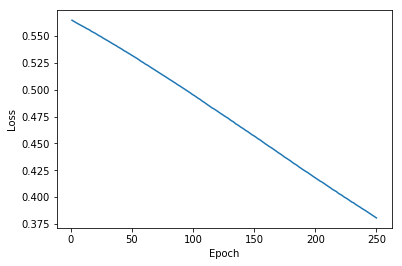

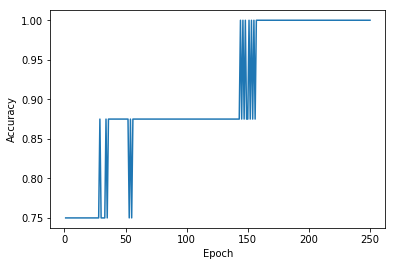

In [18]:
epochs = 250
mlp.fit(x, y, epochs=epochs)
mlp.plot_history()

In [299]:
def plot2(X, Y, clf):
    h = .01  # step size in the mesh

    # Create color maps
    cmap_light = mcolors.ListedColormap(['#FFAAAA', '#FFFFFF', '#AAFFAA'])
    cmap_bold = mcolors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:4, 0], X[:4, 1], c='g', s=200, marker='+')
    plt.scatter(X[4:, 0], X[4:, 1], c='r', s=200, marker='_')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Hours studied')
    plt.ylabel('GPA')

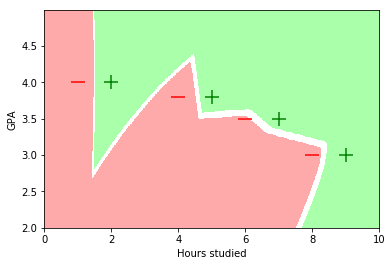

In [300]:
plot2(x, y, mlp.model)

In [20]:
mlp.model.predict(x)

array([[0.8173187 ],
       [0.5712388 ],
       [0.67930806],
       [0.7032467 ],
       [0.08729817],
       [0.29289007],
       [0.41717407],
       [0.42951337]], dtype=float32)

### Bias variance and model complexity

In [3]:
import numpy as np

In [7]:
type(np.random.normal(0, 1, size=(1, 5)))

numpy.ndarray

Noise spread σ=0


/Users/amir.ziai/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


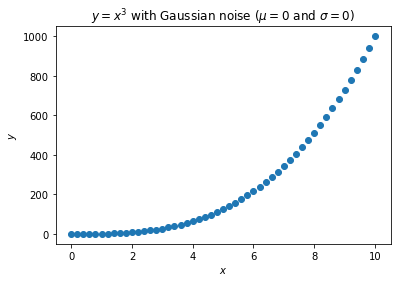

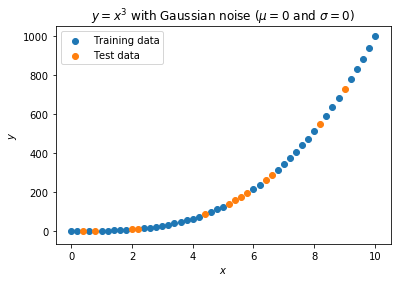

Units      : 2
Layers     : 0
Activation : relu
Train      : 1055.6924342105262
Test       : 1087.921630859375
Time       : 44.95073103904724


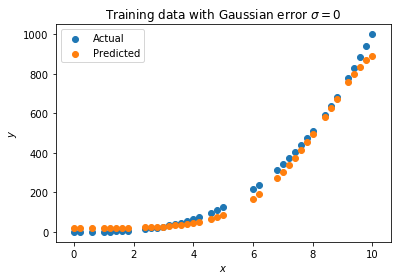

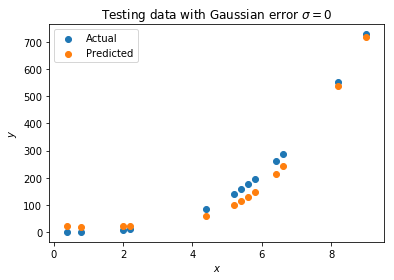

Units      : 10
Layers     : 0
Activation : relu
Train      : 185.67123734323602
Test       : 79.63504028320312
Time       : 44.93898797035217


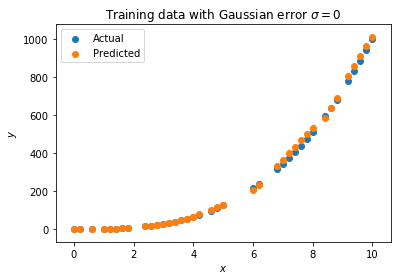

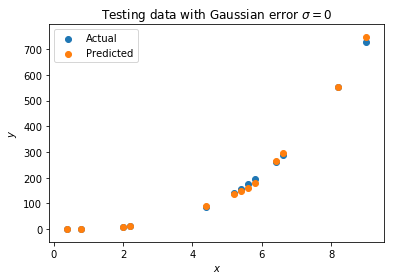

Units      : 100
Layers     : 0
Activation : relu
Train      : 68.27789386950042
Test       : 13.40709114074707
Time       : 46.29974102973938


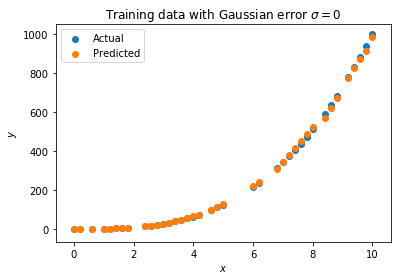

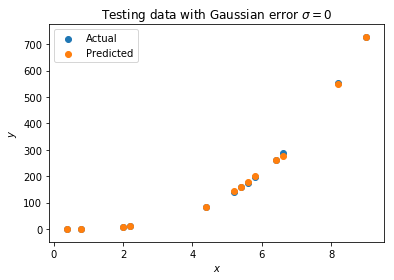

Units      : 2
Layers     : 1
Activation : relu
Train      : 152973.40789473685
Test       : 71499.1171875
Time       : 50.530791997909546


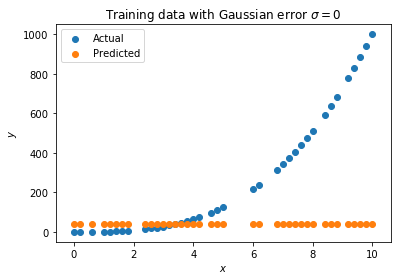

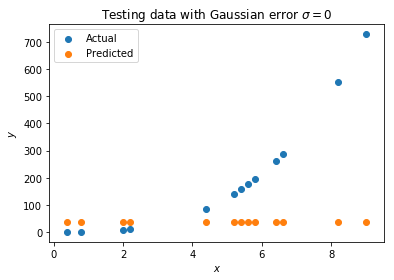

Units      : 10
Layers     : 1
Activation : relu
Train      : 14.5060261676186
Test       : 84.26988220214844
Time       : 49.26684808731079


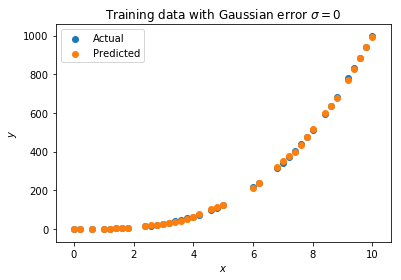

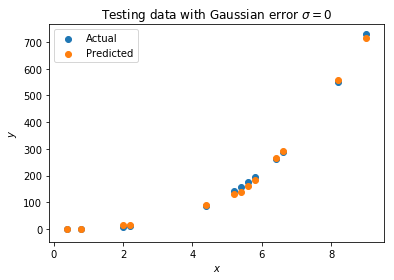

Units      : 100
Layers     : 1
Activation : relu
Train      : 11.309442319368062
Test       : 18.87662696838379
Time       : 49.261000871658325


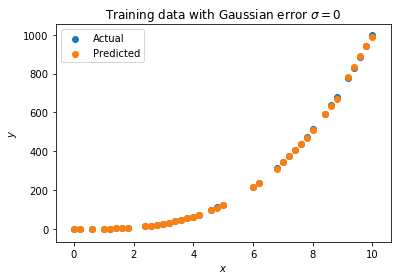

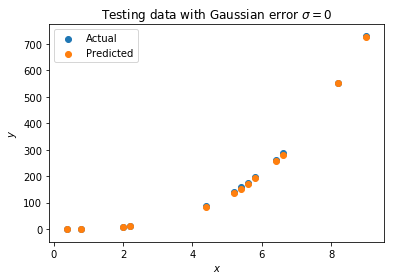

Noise spread σ=25


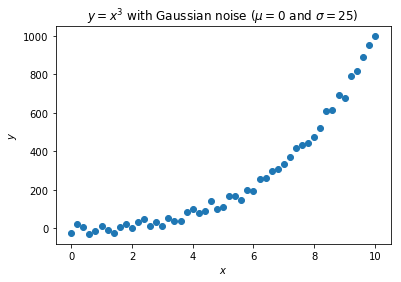

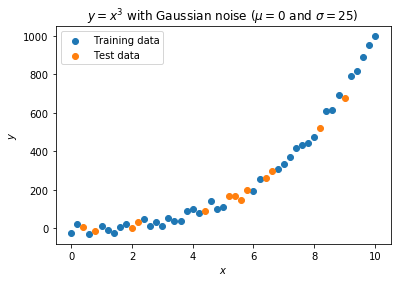

Units      : 2
Layers     : 0
Activation : relu
Train      : 1090.4887952302631
Test       : 2019.7174072265625
Time       : 45.43916702270508


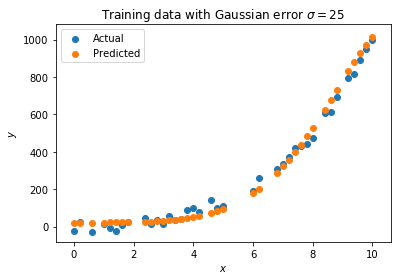

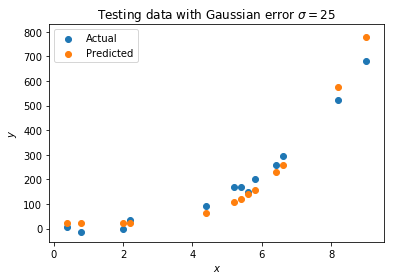

Units      : 10
Layers     : 0
Activation : relu
Train      : 956.2679507606908
Test       : 1901.3231201171875
Time       : 47.46541500091553


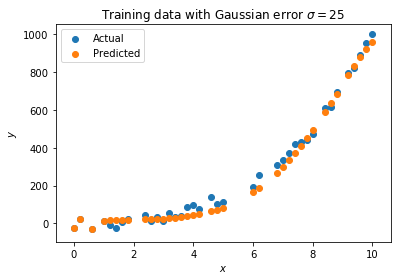

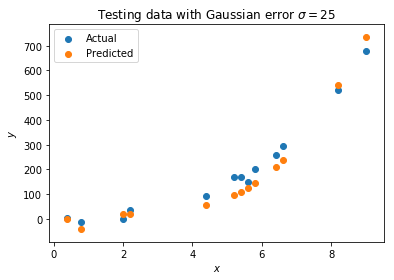

Units      : 100
Layers     : 0
Activation : relu
Train      : 1210.4203394839637
Test       : 4285.19873046875
Time       : 49.2104709148407


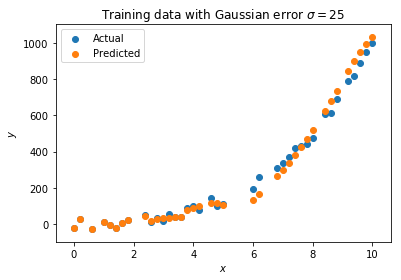

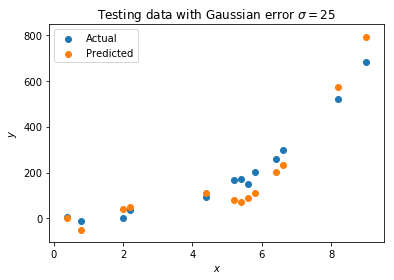

Units      : 2
Layers     : 1
Activation : relu
Train      : 972.9282933285361
Test       : 1684.6199951171875
Time       : 51.15361404418945


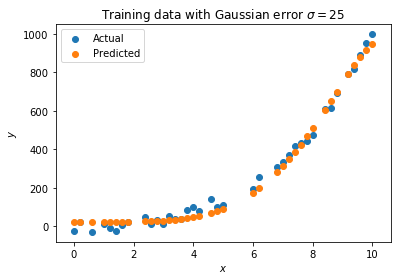

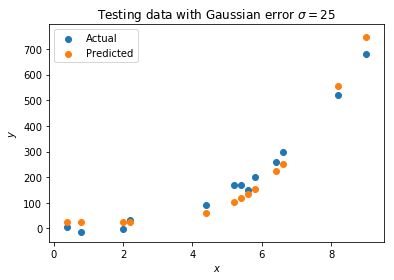

Units      : 10
Layers     : 1
Activation : relu
Train      : 332.93031551963406
Test       : 577.1544189453125
Time       : 57.566421031951904


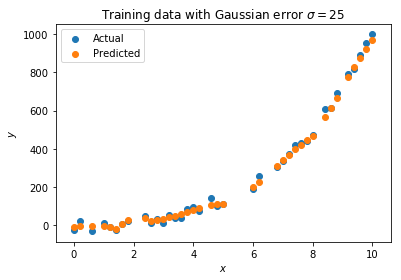

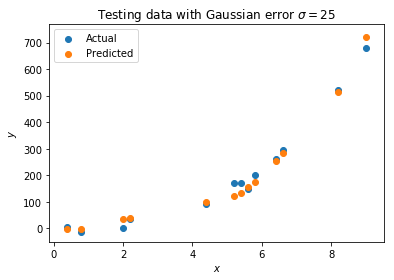

Units      : 100
Layers     : 1
Activation : relu
Train      : 151.70204644454154
Test       : 691.3323364257812
Time       : 61.149959087371826


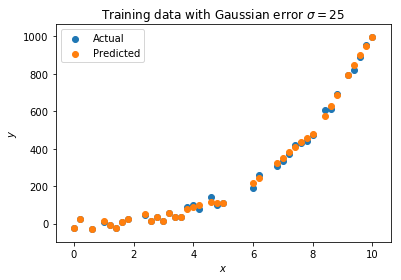

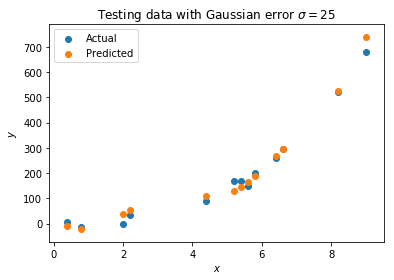

Noise spread σ=50


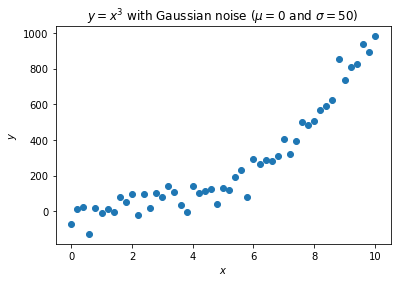

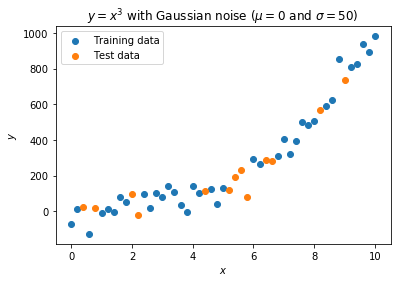

Units      : 2
Layers     : 0
Activation : relu
Train      : 4104.7364309210525
Test       : 3133.06494140625
Time       : 49.89151382446289


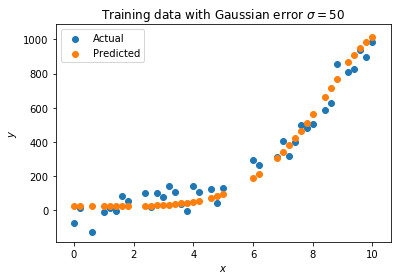

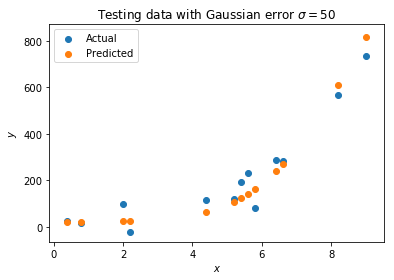

Units      : 10
Layers     : 0
Activation : relu
Train      : 3333.3437756990133
Test       : 4924.8388671875
Time       : 49.886128187179565


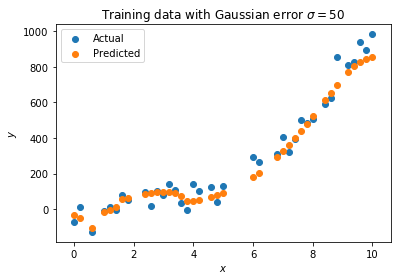

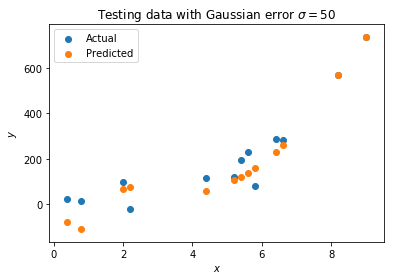

Units      : 100
Layers     : 0
Activation : relu
Train      : 1672.6547980057567
Test       : 5726.0029296875
Time       : 50.157474994659424


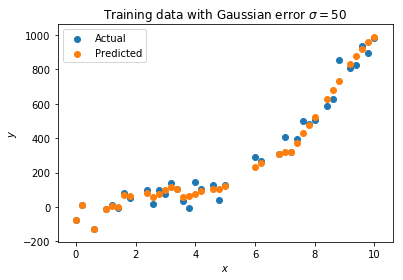

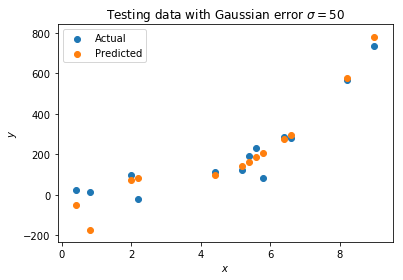

Units      : 2
Layers     : 1
Activation : relu
Train      : 164244.8009868421
Test       : 75180.1953125
Time       : 54.71449303627014


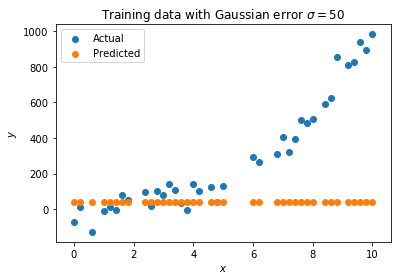

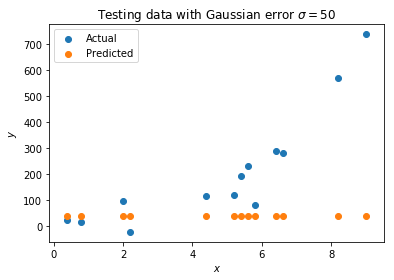

Units      : 10
Layers     : 1
Activation : relu
Train      : 1442.9186754728619
Test       : 7029.27783203125
Time       : 53.015573024749756


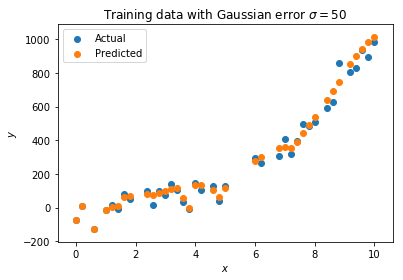

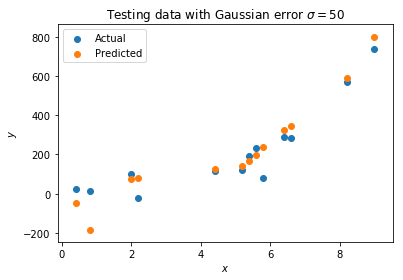

Units      : 100
Layers     : 1
Activation : relu
Train      : 1985.9904014185856
Test       : 8056.0146484375
Time       : 56.27633786201477


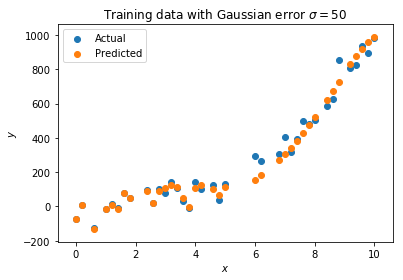

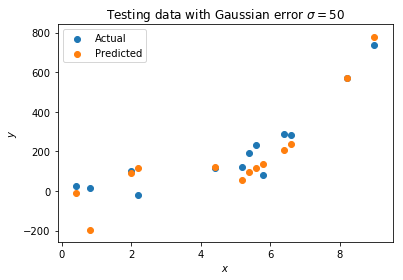

In [49]:
errors = [0, 25, 50]
epochs = 20000
layers_set = [0, 1]
units_set = [2, 10, 100]
activations_set = ['relu']

with open('bias-variance-results-8.csv', 'a') as f:
    f.write('error,units,activation,layers,time,train,test\n')
    
    for error in errors:
        print('Noise spread σ={}'.format(error))
        x = np.arange(0, 10.2, 0.2)
        xs = np.array([x, x ** 2, x ** 4, x ** 5, x ** 6, x ** 7,
                       np.sin(x), np.cos(x)])
        xs = xs.T

        title = '$y=x^3$ with Gaussian noise ($\mu=0$ and $\sigma={})$'.format(error)
        y = x ** 3 + np.random.normal(0, error, size=x.shape)
        fig, ax = plt.subplots()
        plt.scatter(x, y);
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.title(title)
        ax.legend()
        plt.show()

        train_x, test_x, train_y, test_y = train_test_split(xs, y,
                                                            random_state=seed)
        plt.scatter(train_x[:, 0], train_y, label='Training data')
        plt.scatter(test_x[:, 0], test_y, label='Test data')
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.title(title)
        plt.legend()
        plt.show()

        def create_model(units, activation, layers):
            model = Sequential()
            model.add(Dense(units, input_dim=xs.shape[1],
                            kernel_initializer='normal', activation=activation))
            for _ in range(layers):
                model.add(Dense(units, kernel_initializer='normal', activation=activation))
            model.add(Dense(1, kernel_initializer='normal'))
            model.compile(loss='mean_squared_error', optimizer='adam')
            return model

        configs = [
            (u, a, l)
            for l in layers_set
            for u in units_set
            for a in activations_set
        ]

        for units, activation, layers in configs:
            create_model_function = partial(create_model,
                                            units=units,
                                            layers=layers,
                                            activation=activation)
            model = KerasRegressor(build_fn=create_model_function,
                                   epochs=epochs, verbose=0)
            tic = time()
            model.fit(train_x, train_y)
            time_elapsed = time() - tic

            score_train =  model.score(train_x, train_y)
            score_test = model.score(test_x, test_y)
            print('Units      : {}'.format(units))
            print('Layers     : {}'.format(layers))
            print('Activation : {}'.format(activation))
            print('Train      : {}'.format(score_train))
            print('Test       : {}'.format(score_test))
            print('Time       : {}'.format(time_elapsed))

            fig, ax = plt.subplots()
            plt.scatter(train_x[:, 0], train_y, label='Actual')
            plt.scatter(train_x[:, 0], model.predict(train_x), label='Predicted')
            ax.legend()
            plt.xlabel('$x$')
            plt.ylabel('$y$')
            plt.title('Training data with Gaussian error $\sigma={}$'.format(error))
            plt.show()

            fig, ax = plt.subplots()
            plt.scatter(test_x[:, 0], test_y, label='Actual')
            plt.scatter(test_x[:, 0], model.predict(test_x), label='Predicted')
            ax.legend()
            plt.xlabel('$x$')
            plt.ylabel('$y$')
            plt.title('Testing data with Gaussian error $\sigma={}$'.format(error))
            plt.show()
            
            out = '{},{},{},{},{},{},{}\n'.format(error, units, activation,
                                            layers, time_elapsed, score_train, score_test)
            f.write(out)

In [52]:
df = pd.read_csv('bias-variance-results-8.csv')
df.head()

,error,units,activation,layers,time,train,test
0,0,2,relu,0,44.950731,1055.692434,1087.921631
1,0,10,relu,0,44.938988,185.671237,79.635040
2,0,100,relu,0,46.299741,68.277894,13.407091
3,0,2,relu,1,50.530792,152973.407895,71499.117188
4,0,10,relu,1,49.266848,14.506026,84.269882


In [53]:
df.shape

(18, 7)

In [54]:
df.error.value_counts()

25    6
50    6
0     6
Name: error, dtype: int64

In [78]:
def complexity_curve(error):
    a = df[df.error == error].sort_values(by=['units'])
    for l, g in a.groupby(['layers']):
        g.plot(x='units', y=['train', 'test'])
        plt.xlabel('Hidden units')
        plt.title('Hidden Layers: {}'.format(l))
        plt.ylabel('MSE')
        plt.show()

In [86]:
df[df.error == 0].sort_values(by=['layers', 'units'])

,error,units,activation,layers,time,train,test
0,0,2,relu,0,44.950731,1055.692434,1087.921631
1,0,10,relu,0,44.938988,185.671237,79.635040
2,0,100,relu,0,46.299741,68.277894,13.407091
3,0,2,relu,1,50.530792,152973.407895,71499.117188
4,0,10,relu,1,49.266848,14.506026,84.269882
5,0,100,relu,1,49.261001,11.309442,18.876627


In [87]:
df[df.error == 25].sort_values(by=['layers', 'units'])

,error,units,activation,layers,time,train,test
6,25,2,relu,0,45.439167,1090.488795,2019.717407
7,25,10,relu,0,47.465415,956.267951,1901.323120
8,25,100,relu,0,49.210471,1210.420339,4285.198730
9,25,2,relu,1,51.153614,972.928293,1684.619995
10,25,10,relu,1,57.566421,332.930316,577.154419
11,25,100,relu,1,61.149959,151.702046,691.332336


In [85]:
df[df.error == 50].sort_values(by=['layers', 'units'])

,error,units,activation,layers,time,train,test
12,50,2,relu,0,49.891514,4104.736431,3133.064941
13,50,10,relu,0,49.886128,3333.343776,4924.838867
14,50,100,relu,0,50.157475,1672.654798,5726.002930
15,50,2,relu,1,54.714493,164244.800987,75180.195312
16,50,10,relu,1,53.015573,1442.918675,7029.277832
17,50,100,relu,1,56.276338,1985.990401,8056.014648


/Users/amir.ziai/anaconda/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


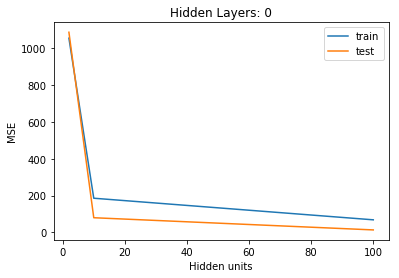

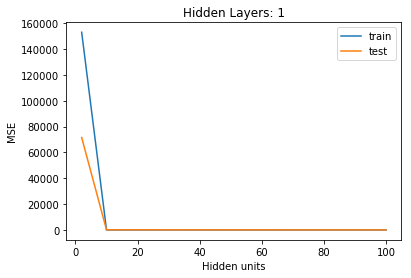

In [79]:
complexity_curve(0)

/Users/amir.ziai/anaconda/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


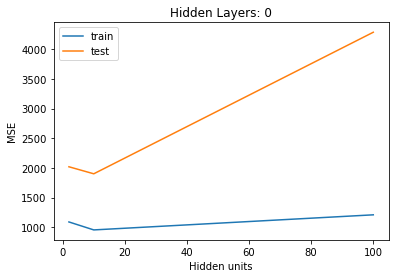

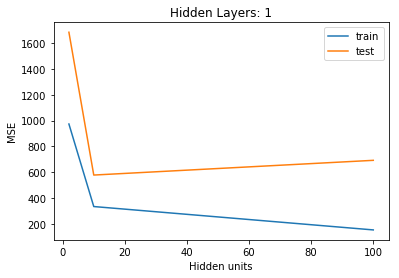

In [80]:
complexity_curve(25)

/Users/amir.ziai/anaconda/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


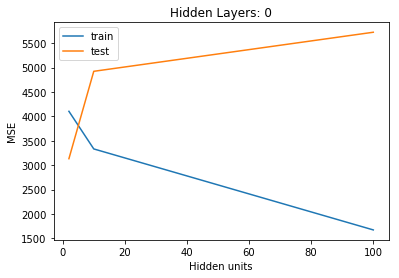

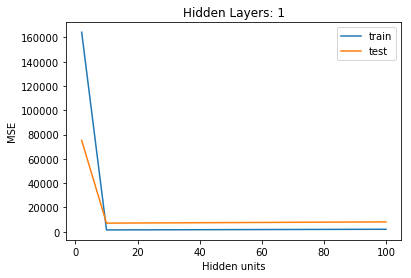

In [81]:
complexity_curve(50)

### Architectures

https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464

#### Wide and deep

In [29]:
from itertools import combinations

In [8]:
import pandas as pd

from sklearn.model_selection import train_test_split

def csv_write(df, path):
    df.to_csv(path, header=None, index=False)

path_orig = 'student-por.csv'
path_train = 'student_train.csv'
path_test = 'student_test.csv'
path_validation = 'student_validation.csv'
size_test = 0.1  # use 10% of the data for testing
size_validation = 0.2  # use 20% of the data for validation
seed = 0

epochs_per_eval = 10
batch_size = 50
train_epochs = 100
hidden_units = [100, 75, 50, 25]

df = pd.read_csv(path_orig, delimiter=';')
df['G3'] = np.where(df.G3 >= 10, 'pass', 'fail')
df_train_validation, df_test = train_test_split(df,
                                                test_size=size_test,
                                                random_state=seed)
df_train, df_validation = train_test_split(df_train_validation,
                                           test_size=size_validation,
                                           random_state=seed)

csv_write(df_train, path_train)
csv_write(df_test, path_test)
csv_write(df_validation, path_validation)

column_names = list(df.columns)
record_defaults = [[''] if dtype == object else [0]
                   for dtype in df.dtypes]

def build_model_columns():
    cat = []
    cat_indicator = []
    num = []

    for column in df.columns:
        if column != 'G3':
            if df.dtypes[column] == object:
                col_cats = list(df[column].unique())
                tf_col = tf.feature_column.categorical_column_with_vocabulary_list(column,
                                                                                col_cats)
                cat.append(tf_col)
                cat_indicator.append(tf.feature_column.indicator_column(tf_col))
            else:
                tf_col = tf.feature_column.numeric_column(column)
                num.append(tf_col)

    crossed = [tf.feature_column.crossed_column([c1, c2],
                                                hash_bucket_size=1000) for c1, c2 in combinations(cat, 2)]

    deep_columns = num + cat_indicator
    wide_columns = num + cat + crossed
    
    return wide_columns, deep_columns

wide_columns, deep_columns = build_model_columns()
run_config = tf.estimator.RunConfig().replace(
      session_config=tf.ConfigProto(device_count={'GPU': 0}))

model_wide_deep = tf.estimator.DNNLinearCombinedClassifier(
        model_dir='student_model_wd/',
        linear_feature_columns=wide_columns,
        dnn_feature_columns=deep_columns,
        dnn_hidden_units=hidden_units,
        config=run_config)

model_wide = tf.estimator.LinearClassifier(
        model_dir='student_model_w/',
        feature_columns=wide_columns,
        config=run_config)

model_deep = tf.estimator.DNNClassifier(
        model_dir='student_model_d/',
        feature_columns=deep_columns,
        hidden_units=hidden_units,
        config=run_config)

def input_fn(data_file, num_epochs, shuffle, batch_size):
    def parse_csv(value):
        columns = tf.decode_csv(value,
                                record_defaults=record_defaults)
        features = dict(zip(column_names, columns))
        labels = features.pop('G3')
        return features, tf.equal(labels, 'pass')

    dataset = tf.data.TextLineDataset(data_file)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=5)

    dataset = dataset.map(parse_csv, num_parallel_calls=1)

    dataset = dataset.repeat(num_epochs)
    dataset = dataset.batch(batch_size)
    return dataset

models = {
    'wide': model_wide,
    'deep': model_deep,
    'wd': model_wide_deep
}

stats = {}

for name, model in models.items():
    print('Model type: {}'.format(name))
    for n in range(train_epochs // epochs_per_eval):
        model.train(input_fn=lambda: input_fn(
            path_train, epochs_per_eval, True, batch_size))

        results = model.evaluate(input_fn=lambda: input_fn(
            path_validation, 1, False, batch_size))

        # Display evaluation metrics
        print('Results at epoch', (n + 1) * epochs_per_eval)
        print('-' * 60)

        for key in sorted(results):
            print('%s: %s' % (key, results[key]))
            
    stats[name] = results
    print('=' * 100)

### Tuning

#### Tips

http://ruder.io/optimizing-gradient-descent/index.html#rmsprop

https://classroom.udacity.com/nanodegrees/nd889/parts/16cf5df5-73f0-4afa-93a9-de5974257236/modules/9da6b5e3-590a-40b9-bb5b-f67b66ef2930/lessons/fa6a2e47-7406-49d5-9f0f-17100c65c888/concepts/63add149-8f5c-4362-87ef-75c080592a4c

https://classroom.udacity.com/nanodegrees/nd889/parts/16cf5df5-73f0-4afa-93a9-de5974257236/modules/9da6b5e3-590a-40b9-bb5b-f67b66ef2930/lessons/fa6a2e47-7406-49d5-9f0f-17100c65c888/concepts/6d3834cc-b5be-442b-9581-1c5fcf1615a8

https://arxiv.org/pdf/1206.5533.pdf

http://neuralnetworksanddeeplearning.com/chap3.html#how_to_choose_a_neural_network's_hyper-parameters

http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf

https://blog.slavv.com/37-reasons-why-your-neural-network-is-not-working-4020854bd607
